# Exercise 02: Data Wrangling

Welcome to the second exercise for Applied Machine Learning. 

Your objectives for this session are to 
- learn the basics of data wrangling with the `pandas` library, 
- learn to find programming solutions in documentation and other places online.

------------

### Part 1: The basics

We wrapped up last week's exercise by mentioning that libraries are collections of pre-written code that users can import and use to optimize tasks, and then we imported the `pandas` library, like so:

In [6]:
import pandas as pd

We'll also use the `matplotlib` library later in this notebook, so let's import that too (in general, it's good practice to import all the libraries used in a notebook at/near the top of the notebook, so someone running the notebook can easily identify the libraries needed).

In [7]:
import matplotlib.pyplot as plt

With `pandas` we can read in csv files and explore them. 

In [3]:
# read in csv file into a dataframe
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

The data we just read in consists of 50 samples from each of three species of the Iris flower (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

Let's take a look at the data.

In [4]:
# take a look at the first 5 rows of the dataframe
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
# print descriptive statistics of the dataset
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# unique values within a columm and their count
df.species.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Now say we want to manipulate the data by adding a new column for a new variable. The code below adds a column called `sepal_length_to_width` containing the ratio of `sepal_length` to `sepal_width`.

In [7]:
# create a new coloumn called `sepal_length_width` containing the ratio of `sepal_length` to `sepal_width`
df['sepal_length_to_width'] = df['sepal_length'] / df['sepal_width']
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_to_width
0,5.1,3.5,1.4,0.2,setosa,1.457143
1,4.9,3.0,1.4,0.2,setosa,1.633333
2,4.7,3.2,1.3,0.2,setosa,1.468750
3,4.6,3.1,1.5,0.2,setosa,1.483871
4,5.0,3.6,1.4,0.2,setosa,1.388889


Say we want to select all the instances where `petal_width` is smaller than 0.2. For this we can combine conditional statements with `pandas`. 

In [9]:
df_test = df[df['petal_width'] < 0.2]
df_test

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_to_width
9,4.9,3.1,1.5,0.1,setosa,1.580645
12,4.8,3.0,1.4,0.1,setosa,1.600000
13,4.3,3.0,1.1,0.1,setosa,1.433333
32,5.2,4.1,1.5,0.1,setosa,1.268293
37,4.9,3.6,1.4,0.1,setosa,1.361111


# <font color='red'>TASK 1</font>

Now you try it. 

Add another column called `petal_length_to_width`, which is the ratio of `petal_length` to `petal_width`. Then select all the instances where `petal_length_to_width` is less than `sepal_length_to_width`.

In [ ]:
# your code here
df['petal_length_to_width'] = df['petal_length'] / df['petal_width']
df_test2 = df[df['petal_length_to_width'] < df['sepal_length_to_width']]
df_test2

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_to_width,petal_length_to_width
141,6.9,3.1,5.1,2.3,virginica,2.225806,2.217391


### Part 2: Diving into `pandas` 

For the remainder of the exercise your job is to complete the following tasks, which involve reading in and wrangling with two csv data files, which you should download from on Canvas: `purchases_more.csv` and `IMDB-Movie-Data.csv`.

The functions you should use might be new to you, because I haven't shown them all to you here or in Exercise 1. For this reason, you'll likely need to consult the documentation for the `pandas` library found here: https://pandas.pydata.org/docs/user_guide/index.html

Being able to find solutions to programming problems on your own — either in official documentation, on public forums like Stack Overflow, or among other resources online — is an important skill in itself. 

# <font color='red'>TASK 2</font>


Read the file `purchases_more.csv` and inspect the first three rows.

In [8]:
# your code here
purchases_more = pd.read_csv('purchases_more.csv')

# <font color='red'>TASK 3</font>

How many rows and columns are in the dataset?

In [11]:
# your code here
rows, columns = purchases_more.shape
print(f"Rows: {rows}, Columns: {columns}")

Rows: 36, Columns: 7


# <font color='red'>TASK 4</font>


Remove any duplicate instances and check the number of rows and columns again.

In [12]:
# your code here
purchases_more.drop_duplicates(inplace=True)
rows, columns = purchases_more.shape
print(f"Rows: {rows}, Columns: {columns}")

Rows: 30, Columns: 7


# <font color='red'>TASK 5</font>

Check for missing data. How many `NaN`s are there in each column?

In [13]:
# your code here
print(purchases_more.isna().sum())

names        0
gender       0
education    0
apples       0
oranges      2
pears        4
kiwis        0
dtype: int64


# <font color='red'>TASK 6</font>

One way to handle missing data is to replace missing values with substituted values based on the other data available. This is called *imputation*. 

For each column, replace each null value with the average value for that column. Then check how many `NaN`s there are in each column (there should be 0 in every column).

In [17]:
# your code here
# Replace NaN only in selected columns
columns_to_fill = ['apples', 'pears', 'oranges', 'kiwis']  # change to your column names
means = purchases_more[columns_to_fill].mean()
purchases_more[columns_to_fill] = purchases_more[columns_to_fill].fillna(means)
print(purchases_more.isna().sum())

names        0
gender       0
education    0
apples       0
oranges      0
pears        0
kiwis        0
dtype: int64


# <font color='red'>TASK 7</font>

Select all rows where more than 3 apples were purchased.

In [18]:
# your code here
purchases_more_above_3_apples = purchases_more[purchases_more['apples'] > 3]
purchases_more_above_3_apples

,names,gender,education,apples,oranges,pears,kiwis
4,Benjamin,male,Master,9,9.0,6.0,7
7,Elijah,male,Master,8,9.0,4.0,8
10,Emily,female,Master,9,9.0,9.0,1
11,Emma,female,Doctoral,4,2.0,7.0,5
12,Evelyn,female,Master,9,0.0,4.0,1
13,Harper,female,Bachelor,8,8.0,5.0,8
14,Isabella,female,Master,5,9.0,4.0,0
15,James,male,Master,5,0.0,5.0,7
19,Lucas,male,Master,6,7.0,6.0,5
27,Sofia,female,Bachelor,4,4.0,4.0,7


# <font color='red'>TASK 8</font>

Select those rows where more apples than pears were purchased.

In [19]:
# your code here
more_apples_than_pears = purchases_more[purchases_more['apples'] > purchases_more['pears']]
more_apples_than_pears

,names,gender,education,apples,oranges,pears,kiwis
3,Avery,female,Post secondary,2,1.000000,1.0,3
4,Benjamin,male,Master,9,9.000000,6.0,7
7,Elijah,male,Master,8,9.000000,4.0,8
12,Evelyn,female,Master,9,0.000000,4.0,1
13,Harper,female,Bachelor,8,8.000000,5.0,8
14,Isabella,female,Master,5,9.000000,4.0,0
21,Mia,female,Master,1,5.178571,0.0,6
23,Noah,male,Master,3,5.000000,0.0,4


# <font color='red'>TASK 9</font>

Read in `IMDB-Movie-Data.csv` and show the number of rows and columns.

In [20]:
# your code here
imdb = pd.read_csv('IMDB-Movie-Data.csv')

# <font color='red'>TASK 10</font>

Select the movies that were released between 2010 and 2013, have a rating above 8.5, and have revenue above the 75th percentile.

In [22]:
# your code here
# Calculate the 75th percentile for revenue
revenue_75 = imdb['Revenue (Millions)'].quantile(0.75)

# Select rows matching all criteria
selected_movies = imdb[
    (imdb['Year'] >= 2010) &
    (imdb['Year'] <= 2013) &
    (imdb['Rating'] > 8.5) &
    (imdb['Revenue (Millions)'] > revenue_75)
]
selected_movies

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
80,81,Inception,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0


# <font color='red'>TASK 11</font>

How many unique directors are there in this data?

In [23]:
# your code here
unique_directors = imdb['Director'].nunique()
print(f"Number of unique directors: {unique_directors}")

Number of unique directors: 644


# <font color='red'>TASK 12</font>

Which director has directed the most movies?

In [24]:
# your code here
director_most_movies = imdb['Director'].value_counts().idxmax()
print(f"Director with the most movies: {director_most_movies}")

Director with the most movies: Ridley Scott


# <font color='red'>TASK 13</font>

Create a dataframe called `directors_ratings` with a column for the `Director` and a column called `Rating` with the average rating for all the films by that director.

In [25]:
# your code here
directors_ratings = imdb.groupby('Director', as_index=False)['Rating'].mean()
directors_ratings.head()

,Director,Rating
0,Aamir Khan,8.5
1,Abdellatif Kechiche,7.8
2,Adam Leon,6.5
3,Adam McKay,7.0
4,Adam Shankman,6.3


# <font color='red'>TASK 14</font>

Show the top ten directors sorted by rating

In [27]:
# your code here
top_10_directors = directors_ratings.sort_values(by='Rating', ascending=False).head(10)
top_10_directors

,Director,Rating
465,Nitesh Tiwari,8.80
108,Christopher Nolan,8.68
470,Olivier Nakache,8.60
392,Makoto Shinkai,8.60
0,Aamir Khan,8.50
194,Florian Henckel von Donnersmarck,8.50
452,Naoko Yamada,8.40
122,Damien Chazelle,8.40
377,Lee Unkrich,8.30
25,Amber Tamblyn,8.30


# <font color='red'>TASK 15</font>

Create a dataframe called `directors_counts` with a column for the `Director` and a column called `Count` with the number of films made by that director.

In [29]:
# your code here
directors_counts = imdb['Director'].value_counts().reset_index()
directors_counts.columns = ['Director', 'Movie Count']
top_10_directors_by_count = directors_counts.head(10)
top_10_directors_by_count

,Director,Movie Count
0,Ridley Scott,8
1,David Yates,6
2,M. Night Shyamalan,6
3,Paul W.S. Anderson,6
4,Michael Bay,6
5,Zack Snyder,5
6,Denis Villeneuve,5
7,Woody Allen,5
8,Peter Berg,5
9,Danny Boyle,5


# <font color='red'>TASK 16</font>

Join the `director_counts` dataframe you just made with the `director_ratings` dataframe you made in Task 13 to create a new dataframe called `directors_ratings_and_counts`. There should be three columns: `Director`, `Rating`, `Count`.

*Hint: Use the `merge` function from the `pandas` library to ensure the dataframes are joined correctly... Make sure the right film count and average rating are assigned to the right director!*

In [30]:
# your code here
directors_ratings_and_counts = directors_counts.merge(directors_ratings, left_on='Director', right_on='Director')
directors_ratings_and_counts

,Director,Movie Count,Rating
0,Ridley Scott,8,6.850000
1,David Yates,6,7.433333
2,M. Night Shyamalan,6,5.533333
3,Paul W.S. Anderson,6,5.766667
4,Michael Bay,6,6.483333
...,...,...,...
639,Lee Toland Krieger,1,7.200000
640,Gillies MacKinnon,1,5.000000
641,Peter Atencio,1,6.300000
642,James Mangold,1,6.700000


Use the code below to create a scatterplot of the relationship between film count and average rating, and print the correlation.

...Do directors who make more movies also tend to have higher average ratings?

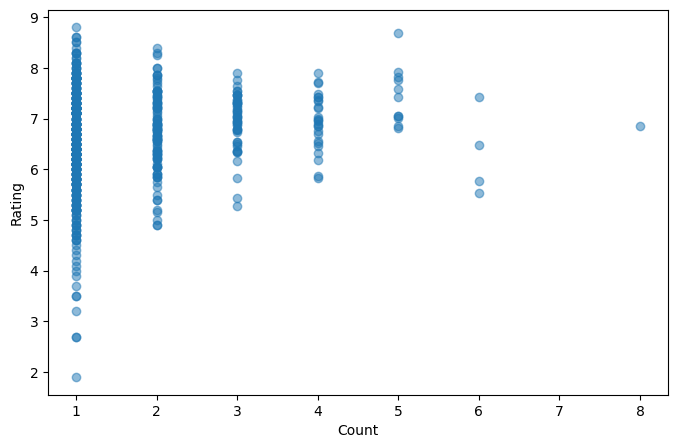

Correlation: 0.1678192462525837


In [33]:
plt.figure(figsize=(8, 5))

# Create scatter plot
plt.scatter(directors_ratings_and_counts['Movie Count'], directors_ratings_and_counts['Rating'], alpha=0.5)

# Add labels and title
plt.ylabel('Rating')
plt.xlabel('Count')

# Show plot
plt.show()

# Calculate the correlation between 'Count' and 'Rating'
correlation = directors_ratings_and_counts['Movie Count'].corr(directors_ratings_and_counts['Rating'])
print(f"Correlation: {correlation}")


# <font color='red'>BONUS TASK</font>

Data visualization is not a big part of this course, but it can be a powerful tool for exploring a dataset. Check out the [`matplotlib` documentation](https://matplotlib.org/stable/) and try creating different types of plots to visualize one of the datasets you've been working with.

----------
#### That's it for today! Next week we program actual machine learning models, starting with decision trees.